# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [21]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset               
y = np.array([[1,1,1,1]]).T       

In [22]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,4)) - 1
# define syn1
syn1 = 2*np.random.random((4,1)) - 1

iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）
syn0_history = [syn0]
syn1_history = [syn1]

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [23]:
for iter in range(80000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
    l2_error = y - l2
    l2_delta = l2_error * nonlin(l2,True)
    
    # how much did we miss?
    l1_error = l2_delta.dot(syn1.T)
    
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)
    
    # update weights
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
     # syn1 update weights
    syn1_history.append(syn1)
    syn0_history.append(syn0)
    
    if (iter% 10000) == 0:
        print("L2_Error:" + str(np.mean(np.abs(l2_error))))
        print("L1_Error:" + str(np.mean(np.abs(l1_error))))
 
    
# print("Output After Training:")
# print(l1)
# print("\n\n")
# print(l1)

L2_Error:0.48719106190718686
L1_Error:0.07982417287223069
L2_Error:0.0024455661751119906
L1_Error:1.1401629582687665e-05
L2_Error:0.0017120117043553096
L1_Error:5.883182411924937e-06
L2_Error:0.0013904580746389728
L1_Error:3.993727858069318e-06
L2_Error:0.0011998828148674645
L1_Error:3.0333799278772e-06
L2_Error:0.0010703402456900546
L1_Error:2.4502765067796406e-06
L2_Error:0.0009749990722758839
L1_Error:2.057895560314711e-06
L2_Error:0.0009010747523120477
L1_Error:1.7754645153406833e-06


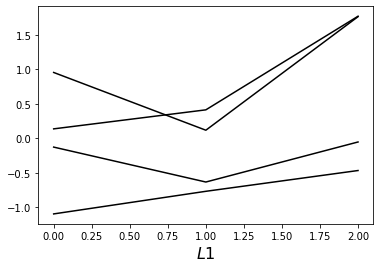

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

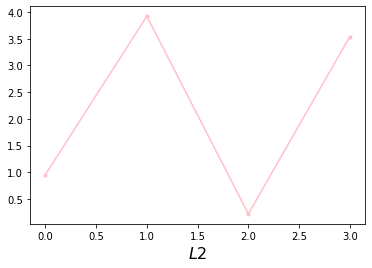

In [25]:
plt.plot(syn1_history[0], 'o-', ms=3, lw=1.5, color='pink')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()

In [26]:
print(l1)
print(l2)

[[0.48695925 0.85405463 0.38545967 0.85481855]
 [0.3350237  0.86823111 0.22539416 0.89909894]
 [0.45547112 0.93841099 0.1732535  0.87114303]
 [0.30747215 0.94492191 0.0886034  0.91096306]]
[[0.99901859]
 [0.99904872]
 [0.99928104]
 [0.99928522]]
